(448, 1344, 4)


(-0.5, 1343.5, 447.5, -0.5)

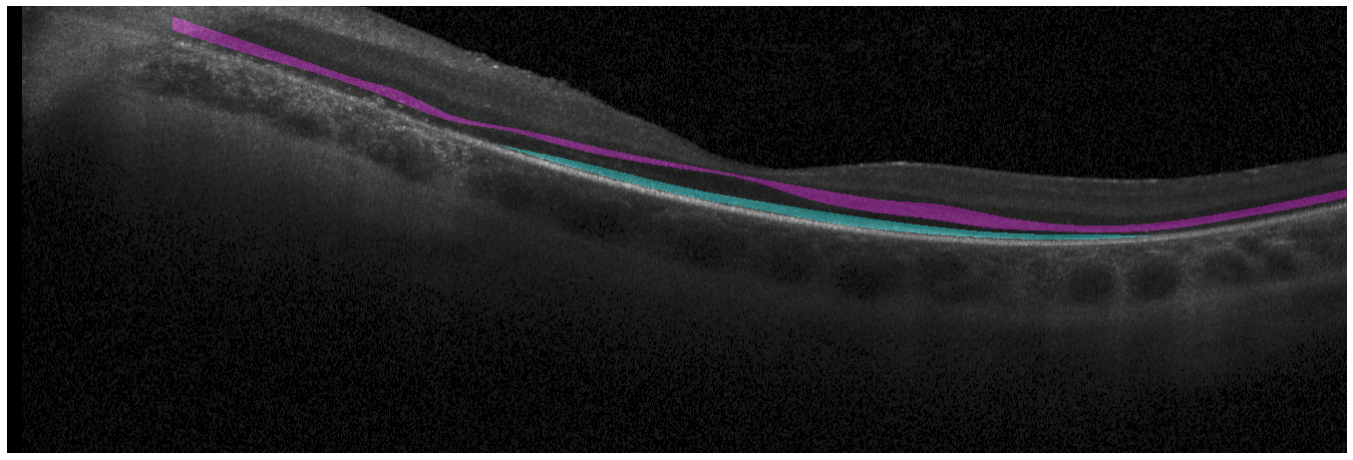

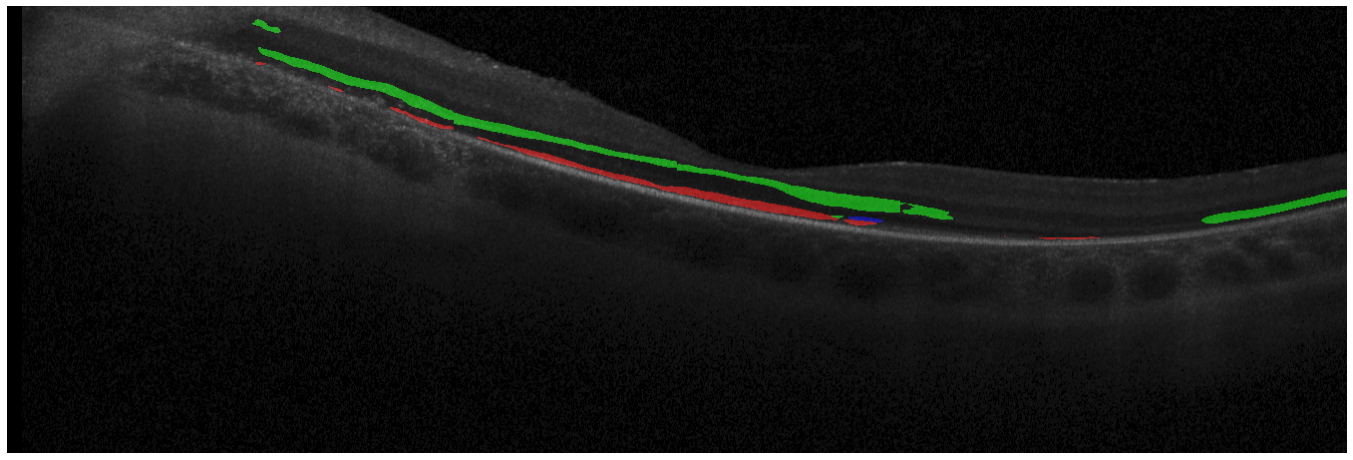

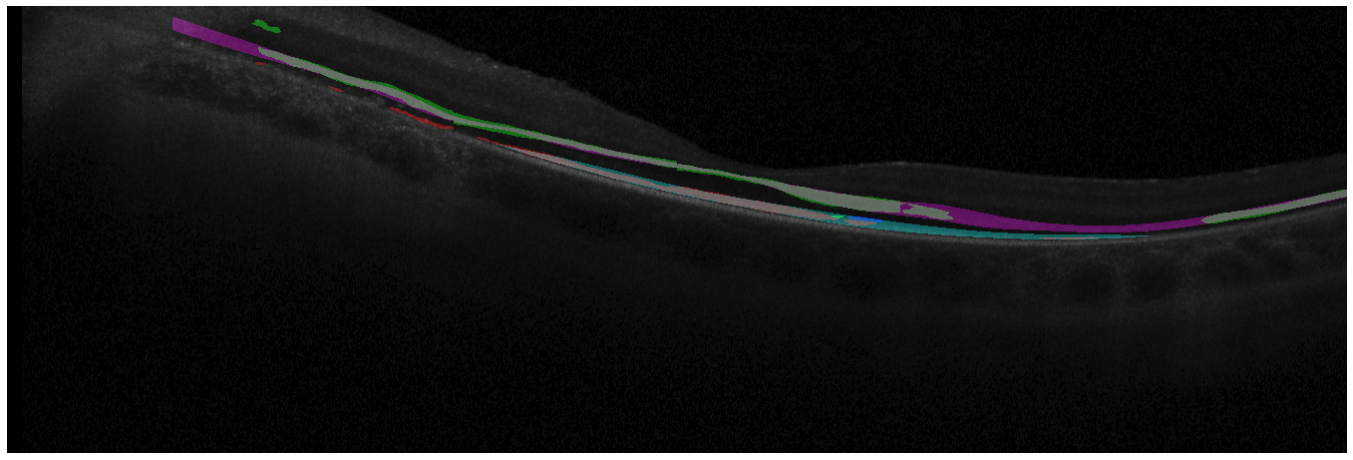

In [54]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

# file = 'Anonym_4_1950_unet.png'
file = 'IRD_RPE65_15_I_1036_0_unet.png'
background = Image.open("../../dataset/preds/Images/" + file)
ov1 = Image.open("../../dataset/preds/pr/" + file)
ov2 = Image.open('../../dataset/preds/Masks/' + file)
ov2 = np.array(ov2)
ov2 = np.expand_dims(ov2, axis=-1)
ov2 = np.repeat(ov2, 3, axis=-1)

ov2_n = np.zeros((ov2.shape[0], ov2.shape[1], 3))

for i in range(ov2.shape[0]):
    for j in range(ov2.shape[1]):
        ov2_n[i, j, :] = np.where(ov2[i, j, :] == [1, 1, 1], [0, 1, 1], ov2_n[i, j, :])
        ov2_n[i, j, :] = np.where(ov2[i, j, :] == [2, 2, 2], [1, 0, 1], ov2_n[i, j, :])
        ov2_n[i, j, :] = np.where(ov2[i, j, :] == [3, 3, 3], [1, 1, 0], ov2_n[i, j, :])

ov2_n = (ov2_n * 255).astype(np.uint8)
ov2 = Image.fromarray(ov2_n)
background = background.convert("RGBA")
ov1 = ov1.convert("RGBA")
ov2 = ov2.convert("RGBA")

print(np.array(background).shape)
ov1_b = Image.blend(background, ov1, 0.5)
ov2_b = Image.blend(ov1_b, ov2, 0.3)
ov3_b = Image.blend(background, ov2, 0.3)

plt.figure(figsize=(24,12))
plt.imshow(ov3_b)
plt.axis('off')

plt.figure(figsize=(24,12))
plt.imshow(ov1_b)
plt.axis('off')

plt.figure(figsize=(24,12))
plt.imshow(ov2_b)
plt.axis('off')

(448, 896, 4)


(-0.5, 895.5, 447.5, -0.5)

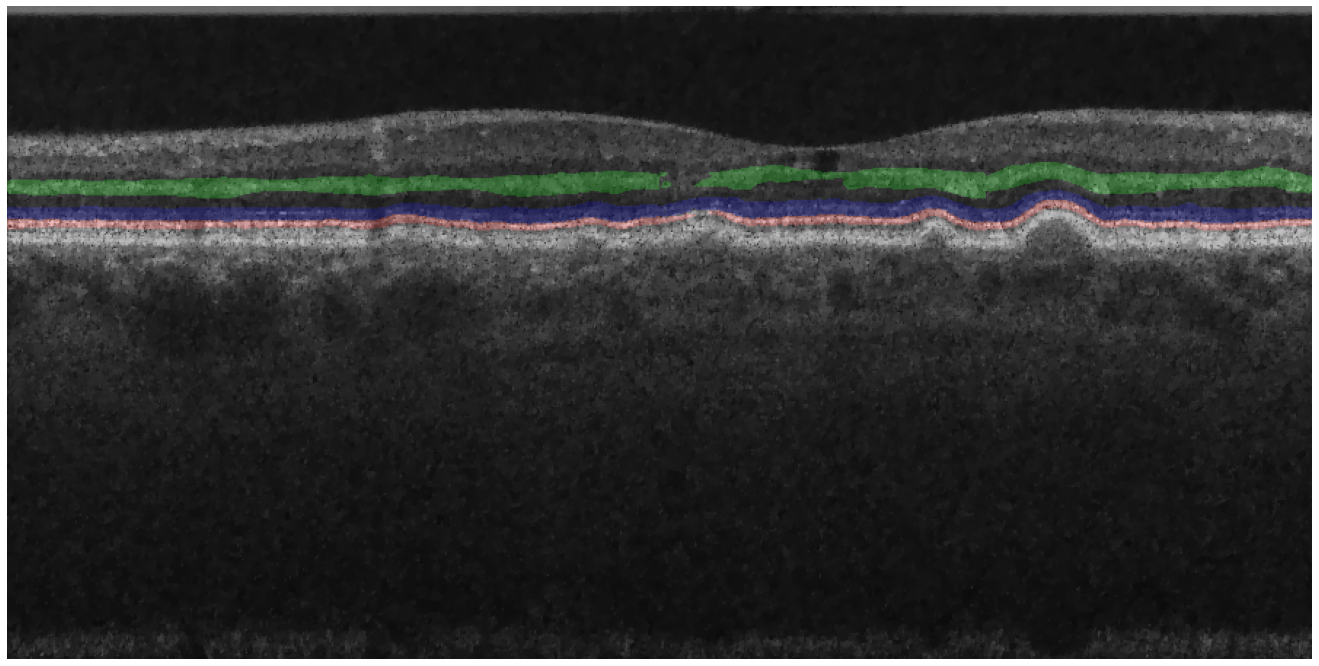

In [55]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

# file = 'Anonym_4_1950_unet.png'

file = 'Farsiu_Ophthalmology_2013_AMD_Subject_1001_unet.png'

background = Image.open("../../dataset/DUKE_preds/Images/" + file)
ov1 = Image.open("../../dataset/DUKE_preds/Preds/" + file)

background = background.convert("RGBA")
ov1 = ov1.convert("RGBA")

print(np.array(background).shape)
ov1_b = Image.blend(background, ov1, 0.2)


plt.figure(figsize=(24,12))
plt.imshow(ov1_b)
plt.axis('off')
